In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [5]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_AL_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.36019,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,NaN,-0.17857,2.062800,NaN,0.424720,1.17850,NaN,NaN,NaN,2.92360,0.772910,NaN
2,-0.16946,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.13605,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.09883,NaN,0.429700,1.63120,3.554100,NaN,NaN,2.17860,1.31400,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.76900,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.46660,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.34480,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.44140,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [6]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	79
float64		column 2	104
float64		column 3	53
float64		column 4	53
float64		column 5	78
float64		column 6	52
float64		column 7	78
float64		column 8	52
float64		column 9	105
float64		column 10	65
float64		column 11	105
float64		column 12	118


In [7]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,721.000000,696.000000,747.000000,747.000000,722.000000,748.000000,722.000000,748.000000,695.000000,735.000000,695.000000,682.000000
mean,1.493467,1.324333,1.979840,1.947956,1.986406,2.001918,1.962480,2.003656,1.996325,1.986432,1.972428,1.972140
std,2.753460,3.623866,1.146445,1.160748,1.169961,1.146180,1.164105,1.143803,1.139463,1.155195,1.188396,1.111702
min,-4.692600,-6.341500,0.020547,0.004051,0.021103,0.001674,0.005922,0.004193,0.009369,0.002484,0.002000,0.000288
25%,-0.421420,-0.581997,1.028950,0.930115,0.976770,0.982355,0.957522,0.954540,1.063500,0.989060,0.895860,1.014750
50%,0.691220,1.991050,1.968700,1.926800,2.017300,2.000550,2.001250,2.028000,1.991100,2.014600,1.974100,1.943250
75%,3.991300,4.531350,2.921950,2.959400,2.997350,3.035550,2.961175,2.934275,2.992050,2.967600,3.080650,2.867550
max,6.771900,8.018800,3.992600,3.997300,3.988600,3.997500,3.999900,3.998200,3.986300,3.998800,3.990900,3.998300


<AxesSubplot:>

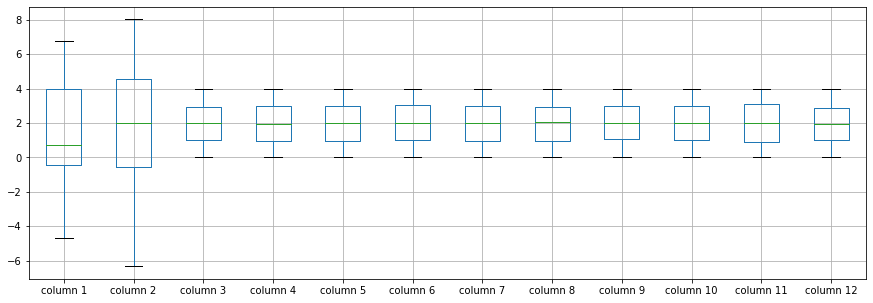

In [8]:
df.boxplot(return_type='axes', figsize=(15,5))

In [9]:
df.mean()

column 1     1.493467
column 2     1.324333
column 3     1.979840
column 4     1.947956
column 5     1.986406
column 6     2.001918
column 7     1.962480
column 8     2.003656
column 9     1.996325
column 10    1.986432
column 11    1.972428
column 12    1.972140
dtype: float64

In [10]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.419216,-0.033860,0.000475,0.054619,0.049693,-0.013159,0.040600,-0.018686,-0.005075,0.044026,0.025446
column 2,-0.419216,1.000000,-0.005804,0.007386,-0.033944,-0.003812,0.033974,0.000483,-0.007249,-0.043394,-0.086753,0.027167
column 3,-0.033860,-0.005804,1.000000,-0.021278,0.077345,0.004082,0.056534,-0.007948,-0.004280,0.003724,-0.063143,0.004254
column 4,0.000475,0.007386,-0.021278,1.000000,0.008463,-0.043346,0.056901,0.034853,-0.018966,0.049817,0.067501,-0.000490
column 5,0.054619,-0.033944,0.077345,0.008463,1.000000,0.029340,0.056767,0.024312,-0.008915,-0.023578,-0.007859,-0.006608
column 6,0.049693,-0.003812,0.004082,-0.043346,0.029340,1.000000,-0.100333,0.037091,0.012773,-0.000961,-0.029709,-0.018627
column 7,-0.013159,0.033974,0.056534,0.056901,0.056767,-0.100333,1.000000,-0.047229,0.000838,-0.042211,-0.025856,-0.006438
column 8,0.040600,0.000483,-0.007948,0.034853,0.024312,0.037091,-0.047229,1.000000,-0.041155,-0.073615,0.007057,-0.047872
column 9,-0.018686,-0.007249,-0.004280,-0.018966,-0.008915,0.012773,0.000838,-0.041155,1.000000,0.022562,-0.011772,-0.005218
column 10,-0.005075,-0.043394,0.003724,0.049817,-0.023578,-0.000961,-0.042211,-0.073615,0.022562,1.000000,-0.055786,0.088479


In [11]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [12]:
imputer = md.Midas(layer_structure = [12,12+25,12+25+25,12+25+25,12+25+25+25+25,12+25+25+25,12+25+25,12+25,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.677539825439453
Epoch: 1 , loss: 26.52930408477783
Epoch: 2 , loss: 26.369037055969237
Epoch: 3 , loss: 26.13217231750488
Epoch: 4 , loss: 25.55404453277588
Epoch: 5 , loss: 23.268864822387695
Epoch: 6 , loss: 20.687339630126953
Epoch: 7 , loss: 20.042401847839354
Epoch: 8 , loss: 19.54965877532959
Epoch: 9 , loss: 19.08653549194336
Epoch: 10 , loss: 18.930257873535155
Epoch: 11 , loss: 18.849800930023193
Epoch: 12 , loss: 18.78294120788574
Epoch: 13 , loss: 18.67400806427002
Epoch: 14 , loss: 18.437834949493407
Epoch: 15 , loss: 18.146446075439453
Epoch: 16 , loss: 18.321317310333253
Epoch: 17 , loss: 18.29011703491211
Epoch: 18 , loss: 18.17401542663574
Epoch: 19 , loss: 18.266464977264405
Epoch: 20 , loss: 18.10041904449463
Epoch: 21 , loss: 17.956697177886962
Epoch: 22 , loss: 18.09046173095703
Epoch: 23 , loss: 18.126551856994627
Epoch: 24 , loss: 18.089827766418455
Epoch: 25 , loss: 17.9857563

In [13]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [14]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.809068
column 3     3.034900
column 4     0.379700
column 5     1.444384
column 6     2.162000
column 7     1.412895
column 8     1.466157
column 9     1.450405
column 10    1.439775
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [15]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [16]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.935985,0.00000,0.0,-1.692366,0.0,0.000000,-0.411389,-0.119081,-1.939092,0.000000,0.000000,0.644036
2,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.43695,0.0,0.000000,0.0,-1.022197,0.868988,0.000000,0.000000,0.191588,0.193344,-0.948912
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
796,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
797,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
798,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [17]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [18]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [19]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(59.614257611525474, 248.22200824735242)

In [20]:
NRMS=numerator/denominator
NRMS


0.24016507654760436

In [21]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [22]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.36019,0.16134,0.067351,3.533700,0.469590,0.679080,3.434400,2.792400,2.776300,1.699100,3.815600,1.746400
1,0.83748,-0.17857,2.062800,1.229234,0.424720,1.178500,1.268811,1.269719,1.277608,2.923600,0.772910,1.285486
2,-0.16946,0.50153,2.470900,3.065000,1.567600,1.482400,0.921600,2.642400,1.518700,2.531800,2.432800,1.876800
3,-0.13605,0.47279,0.588090,1.956300,2.787000,2.595700,2.893300,1.537500,0.999420,3.659300,0.618250,3.265800
4,0.09883,0.67113,0.429700,1.631200,3.554100,1.248903,1.243238,2.178600,1.314000,1.254788,1.220244,1.239488
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.76900,-2.68670,1.576000,0.556120,0.070769,2.074700,0.803040,3.222900,3.493300,1.325500,3.231100,0.005387
796,3.46660,-4.03460,3.100400,1.346100,1.377300,2.288700,0.396130,2.396100,2.463500,1.667500,2.461700,1.226700
797,3.34480,-2.38430,2.031000,2.264600,3.341200,1.537000,1.225600,0.740270,2.495400,1.343300,1.622500,1.585300
798,3.44140,-5.21630,1.577000,1.844000,1.098700,3.424300,0.810810,3.727000,1.187900,0.951120,1.884500,1.143700


In [23]:
imputations[-1].to_excel("4-gauss_AL_10(imp).xlsx", index=False, header=False)